In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.sac import SAC

import matplotlib.pyplot as plt

In [2]:
norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 20
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-02-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)
sac = SAC(
    env=env,
    name='smart_broker',
    input_dim=env.observation_space.shape[0],
    log_freq=1,
    hyprprms={
        'mem_sz': 5000,
        'lr': 0.0004,
    }
)

/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/vinay/code/git/smart-broker/notebooks/../environment.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['rolling_price'] = self.df[self.price_typ].rolling(self.roll_period).sum()
/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [3]:
sac.run(5000)

collecting experience...
0..1..2..3..4..5..6..7..8..9..
Ep: 10 | TS: 5170 | L: -144.57 | R: 0.53 | R.Avg.R: 0.53 | P: -0.15 | R.Avg P: -0.15 | B: 53.51 | R.Avg B: 53.51 | R.Avg.U: 200
Ep: 11 | TS: 5640 | L: -655.09 | R: 0.55 | R.Avg.R: 0.54 | P: 3.38 | R.Avg P: 1.62 | B: 58.55 | R.Avg B: 56.03 | R.Avg.U: 196
Ep: 12 | TS: 6110 | L: -1261.08 | R: 0.54 | R.Avg.R: 0.54 | P: 1.58 | R.Avg P: 1.6 | B: 54.86 | R.Avg B: 55.64 | R.Avg.U: 198
Ep: 13 | TS: 6580 | L: -1910.6 | R: 0.57 | R.Avg.R: 0.54 | P: 5.42 | R.Avg P: 2.56 | B: 56.46 | R.Avg B: 55.85 | R.Avg.U: 201
Ep: 14 | TS: 7050 | L: -2514.95 | R: 0.54 | R.Avg.R: 0.55 | P: 1.22 | R.Avg P: 2.29 | B: 55.23 | R.Avg B: 55.72 | R.Avg.U: 201
Ep: 15 | TS: 7520 | L: -2796.26 | R: 0.55 | R.Avg.R: 0.55 | P: 2.94 | R.Avg P: 2.4 | B: 55.74 | R.Avg B: 55.72 | R.Avg.U: 201
Ep: 16 | TS: 7990 | L: -3060.38 | R: 0.55 | R.Avg.R: 0.55 | P: 2.35 | R.Avg P: 2.39 | B: 56.21 | R.Avg B: 55.79 | R.Avg.U: 201
Ep: 17 | TS: 8460 | L: -3548.65 | R: 0.54 | R.Avg.R: 0.55 

KeyboardInterrupt: 

## Visualizations

### Training

Text(0.5, 1.0, 'Rolling avg balance per episode')

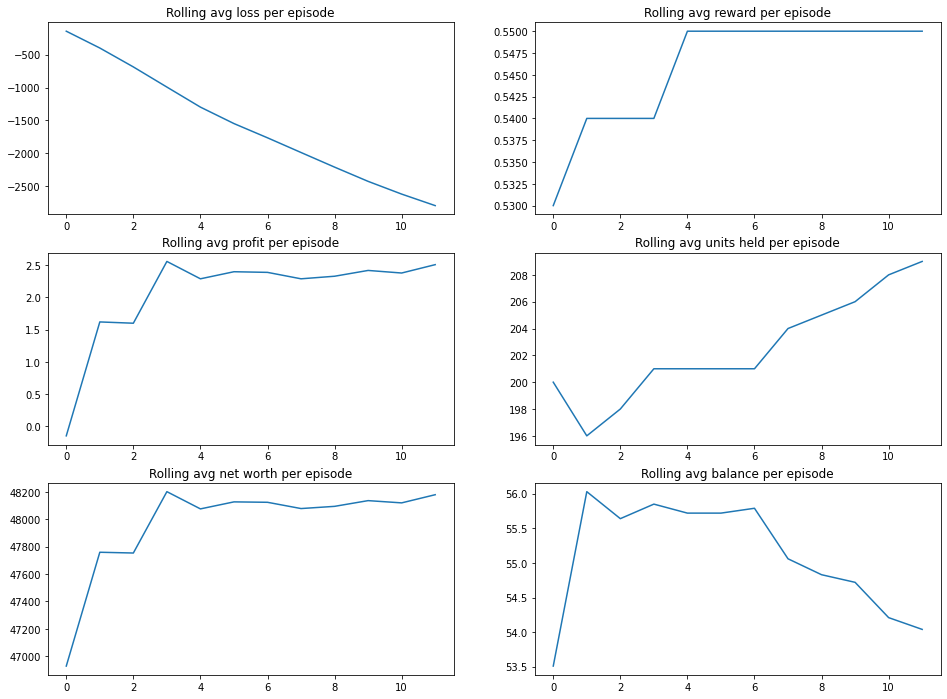

In [4]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in sac.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')